<a href="https://colab.research.google.com/github/sankarsasmal/Python/blob/master/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files

In [36]:
# Upload file
uploaded = files.upload()


Saving income.csv to income (2).csv


In [49]:
df = pd.read_csv("income.csv")

# Show the first few rows
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [51]:
df = pd.DataFrame({
    'age': [27,29,29,28,42,	39,	41,	38,	36,	35,	37,	26,	27,	28,	29,	32,	40,	41,	43,	39,	41,	39],
    'income': [70000,	90000,	61000,	60000,	150000,	155000,	160000,	162000,	156000,	130000,	137000,	45000,	48000,	51000,	49500,	53000,	65000,	63000,	64000,	80000,	82000,	58000


]
})
df.head()

,age,income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [52]:
# Select only numerical features
X = df[['age', 'income']]

# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

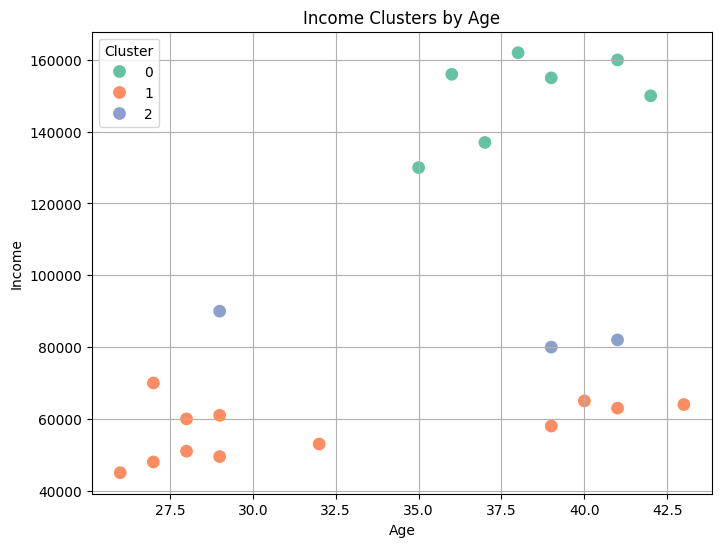

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='income', hue='cluster', palette='Set2', s=100)
plt.title('Income Clusters by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

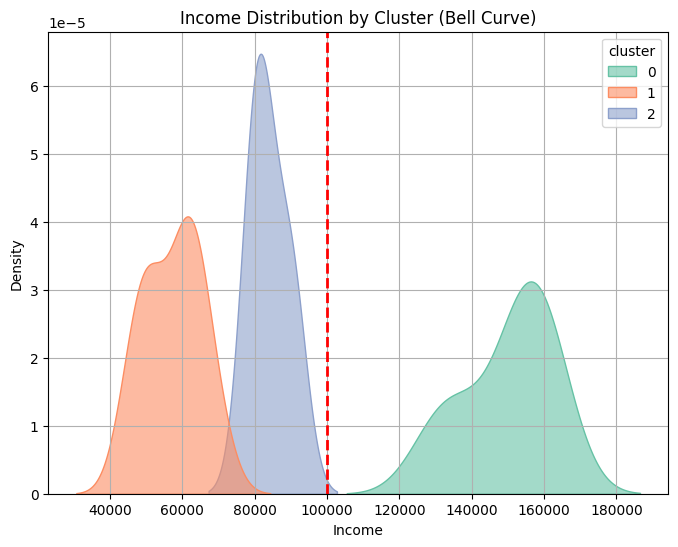

In [54]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='income', hue='cluster', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.axvline(x=100000, color='red', linestyle='--', linewidth=2, label='Income = 100000')
plt.title('Income Distribution by Cluster (Bell Curve)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

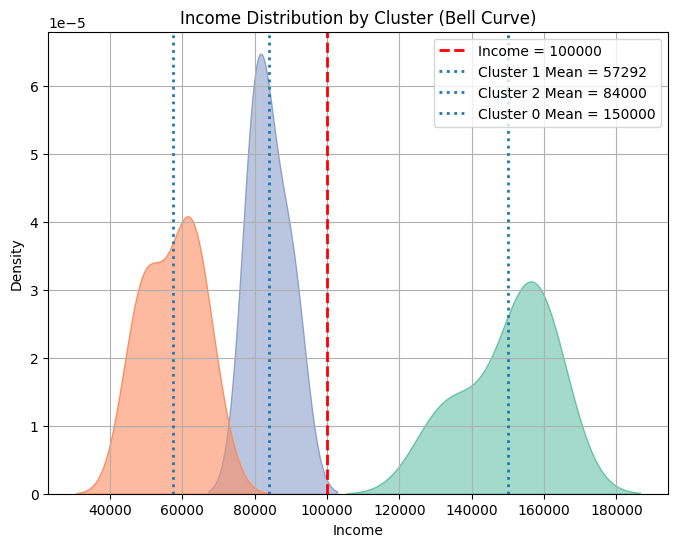

In [55]:
plt.figure(figsize=(8, 6))

# KDE plot
sns.kdeplot(data=df, x='income', hue='cluster', fill=True, common_norm=False, palette='Set2', alpha=0.6)

# Vertical reference line
plt.axvline(x=100000, color='red', linestyle='--', linewidth=2, label='Income = 100000')

# Calculate and plot mean income for each cluster
for cluster_id in df['cluster'].unique():
    cluster_mean = df[df['cluster'] == cluster_id]['income'].mean()
    plt.axvline(x=cluster_mean, linestyle=':', linewidth=2, label=f'Cluster {cluster_id} Mean = {cluster_mean:.0f}')

# Labels and formatting
plt.title('Income Distribution by Cluster (Bell Curve)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['age']])
df['age'] = scaler.transform(df[['age']])
df.head()

,age,income,cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,2
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0


In [44]:
# Select only numerical features
X = df[['age', 'income']]

# Choose number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

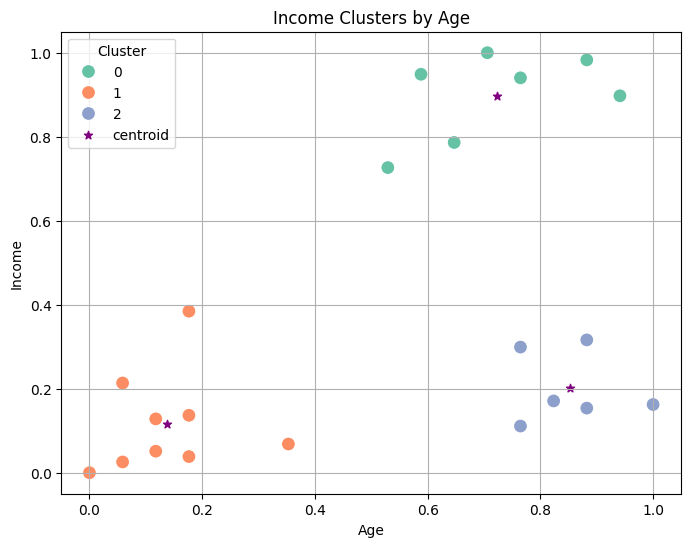

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='income', hue='cluster', palette='Set2', s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title('Income Clusters by Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

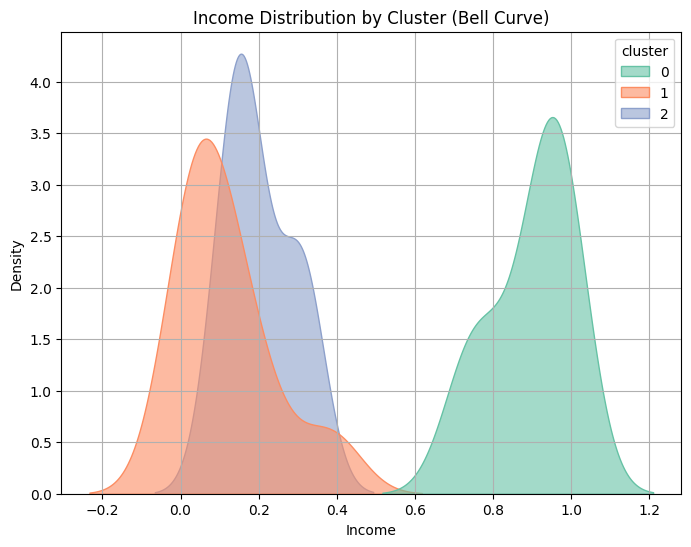

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='income', hue='cluster', fill=True, common_norm=False, palette='Set2', alpha=0.6)
plt.title('Income Distribution by Cluster (Bell Curve)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

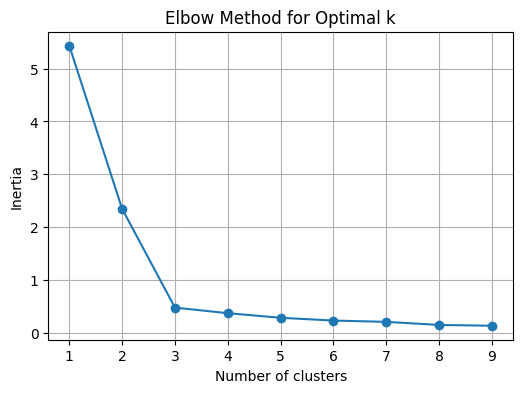

In [17]:
# Elbow Method
inertia = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()